# LSD NOTEBOOK (Classification)

The following notebook is showing the **hyperparameter tuning and classification for LSD**

# Part 1: Data extraction and preparing the dataframe

### 1.1 Importing the files

In [29]:
import scipy.io
import mat73
import matplotlib
import pathlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import random
import sklearn
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedShuffleSplit
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,RobustScaler


from numpy.random import RandomState

import mne
from mne.io import read_raw_fif, read_raw_ctf, read_raw_bti, read_raw_kit
from mne.io import read_raw_artemis123
from mne.datasets import sample, spm_face, testing
from mne.viz import plot_alignment, set_3d_title

#LSD

lsddru01 = mat73.loadmat('LSD_DRU_subject_01.mat')
lsdpla01 = mat73.loadmat('LSD_PLA_subject_01.mat')
lsddru02 = mat73.loadmat('LSD_DRU_subject_02.mat')
lsdpla02 = mat73.loadmat('LSD_PLA_subject_02.mat')
lsddru03 = mat73.loadmat('LSD_DRU_subject_03.mat')
lsdpla03 = mat73.loadmat('LSD_PLA_subject_03.mat')
lsddru04 = mat73.loadmat('LSD_DRU_subject_04.mat')
lsdpla04 = mat73.loadmat('LSD_PLA_subject_04.mat')
lsddru05 = mat73.loadmat('LSD_DRU_subject_05.mat')
lsdpla05 = mat73.loadmat('LSD_PLA_subject_05.mat')
lsddru06 = mat73.loadmat('LSD_DRU_subject_06.mat')
lsdpla06 = mat73.loadmat('LSD_PLA_subject_06.mat')
lsddru07 = mat73.loadmat('LSD_DRU_subject_07.mat')
lsdpla07 = mat73.loadmat('LSD_PLA_subject_07.mat')
lsddru08 = mat73.loadmat('LSD_DRU_subject_08.mat')
lsdpla08 = mat73.loadmat('LSD_PLA_subject_08.mat')
lsddru09 = mat73.loadmat('LSD_DRU_subject_09.mat')
lsdpla09 = mat73.loadmat('LSD_PLA_subject_09.mat')
lsddru10 = mat73.loadmat('LSD_DRU_subject_10.mat')
lsdpla10 = mat73.loadmat('LSD_PLA_subject_10.mat')
lsddru11 = mat73.loadmat('LSD_DRU_subject_11.mat')
lsdpla11 = mat73.loadmat('LSD_PLA_subject_11.mat')
lsddru12 = mat73.loadmat('LSD_DRU_subject_12.mat')
lsdpla12 = mat73.loadmat('LSD_PLA_subject_12.mat')
lsddru13 = mat73.loadmat('LSD_DRU_subject_13.mat')
lsdpla13 = mat73.loadmat('LSD_PLA_subject_13.mat')
lsddru14 = mat73.loadmat('LSD_DRU_subject_14.mat')
lsdpla14 = mat73.loadmat('LSD_PLA_subject_14.mat')
lsddru15 = mat73.loadmat('LSD_DRU_subject_15.mat')
lsdpla15 = mat73.loadmat('LSD_PLA_subject_15.mat')

np.random.seed(244)


### Channel Labels

In [30]:
sLabels = 'PRC_L PRC_R FRS_L FRS_R FRB_L FRB_R FRM_L FRM_R FRO_L FRO_R FIO_L FIO_R FIT_L FIT_R FIB_L FIB_R RLO_L RLO_R SMA_L SMA_R OLF_L OLF_R FSM_L FSM_R FMO_L FMO_R REC_L REC_R INS_L INS_R CIA_L CIA_R CIM_L CIM_R CIP_L CIP_R HIP_L HIP_R PHI_L PHI_R AMY_L AMY_R CAL_L CAL_R CUN_L CUN_R LIN_L LIN_R OCS_L OCS_R OCM_L OCM_R OCI_L OCI_R FUS_L FUS_R POC_L POC_R PAS_L PAS_R PAI_L PAI_R SUM_L SUM_R ANG_L ANG_R PCU_L PCU_R PLO_L PLO_R CAU_L CAU_R PUT_L PUT_R PAL_L PAL_R THA_L THA_R HEL_L HEL_R TES_L TES_R TPS_L TPS_R TEM_L TEM_R TPM_L TPM_R TEI_L TEI_R'

wLabels = 'Precentral_L Precentral_R Frontal_Sup_L Frontal_Sup_R Frontal_Sup_Orb_L Frontal_Sup_Orb_R Frontal_Mid_L Frontal_Mid_R Frontal_Mid_Orb_L Frontal_Mid_Orb_R Frontal_Inf_Oper_L Frontal_Inf_Oper_R Frontal_Inf_Tri_L Frontal_Inf_Tri_R Frontal_Inf_Orb_L Frontal_Inf_Orb_R Rolandic_Oper_L Rolandic_Oper_R Supp_Motor_Area_L Supp_Motor_Area_R Olfactory_L Olfactory_R Frontal_Sup_Medial_L Frontal_Sup_Medial_R Frontal_Med_Orb_L Frontal_Med_Orb_R Rectus_L Rectus_R Insula_L Insula_R Cingulum_Ant_L Cingulum_Ant_R Cingulum_Mid_L Cingulum_Mid_R Cingulum_Post_L Cingulum_Post_R Hippocampus_L Hippocampus_R ParaHippocampal_L ParaHippocampal_R Amygdala_L Amygdala_R Calcarine_L Calcarine_R Cuneus_L Cuneus_R Lingual_L Lingual_R Occipital_Sup_L Occipital_Sup_R Occipital_Mid_L Occipital_Mid_R Occipital_Inf_L Occipital_Inf_R Fusiform_L Fusiform_R Postcentral_L Postcentral_R Parietal_Sup_L Parietal_Sup_R Parietal_Inf_L Parietal_Inf_R SupraMarginal_L SupraMarginal_R Angular_L Angular_R Precuneus_L Precuneus_R Paracentral_Lobule_L Paracentral_Lobule_R Caudate_L Caudate_R Putamen_L Putamen_R Pallidum_L Pallidum_R Thalamus_L Thalamus_R Heschl_L Heschl_R Temporal_Sup_L Temporal_Sup_R Temporal_Pole_Sup_L Temporal_Pole_Sup_R Temporal_Mid_L Temporal_Mid_R Temporal_Pole_Mid_L Temporal_Pole_Mid_R Temporal_Inf_L Temporal_Inf_R'

sLabels = sLabels.split()
wLabels = wLabels.split()


### 1.2 Permutation Entropy and Complexity Measure

In [31]:
# this is code from https://github.com/srk-srinivasan/Permutation-Entropy/blob/master/p_entropy.py
# cite jbarberia, 2021


import numpy as np


def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0]) 

### 1.3 Creating the dataframe per subject

The following functions are creating the dataframe (for each subject) whilst downsampling and calculating the PE and complexity measure per epoch. The `allepochs` function then to combine each epoch into a dataframe

In [32]:
wLabels

wLabels1 = wLabels
wLabels1

['Precentral_L',
 'Precentral_R',
 'Frontal_Sup_L',
 'Frontal_Sup_R',
 'Frontal_Sup_Orb_L',
 'Frontal_Sup_Orb_R',
 'Frontal_Mid_L',
 'Frontal_Mid_R',
 'Frontal_Mid_Orb_L',
 'Frontal_Mid_Orb_R',
 'Frontal_Inf_Oper_L',
 'Frontal_Inf_Oper_R',
 'Frontal_Inf_Tri_L',
 'Frontal_Inf_Tri_R',
 'Frontal_Inf_Orb_L',
 'Frontal_Inf_Orb_R',
 'Rolandic_Oper_L',
 'Rolandic_Oper_R',
 'Supp_Motor_Area_L',
 'Supp_Motor_Area_R',
 'Olfactory_L',
 'Olfactory_R',
 'Frontal_Sup_Medial_L',
 'Frontal_Sup_Medial_R',
 'Frontal_Med_Orb_L',
 'Frontal_Med_Orb_R',
 'Rectus_L',
 'Rectus_R',
 'Insula_L',
 'Insula_R',
 'Cingulum_Ant_L',
 'Cingulum_Ant_R',
 'Cingulum_Mid_L',
 'Cingulum_Mid_R',
 'Cingulum_Post_L',
 'Cingulum_Post_R',
 'Hippocampus_L',
 'Hippocampus_R',
 'ParaHippocampal_L',
 'ParaHippocampal_R',
 'Amygdala_L',
 'Amygdala_R',
 'Calcarine_L',
 'Calcarine_R',
 'Cuneus_L',
 'Cuneus_R',
 'Lingual_L',
 'Lingual_R',
 'Occipital_Sup_L',
 'Occipital_Sup_R',
 'Occipital_Mid_L',
 'Occipital_Mid_R',
 'Occipital_Inf_L'

In [33]:
#function to wrok out the permutatin entropy per 
def permchan(datahun, x):
    permlist = []
    for i in np.arange(0,90,1):
        yesyes= p_entropy(ordinal_patterns(datahun[i],3,x))
        permlist.append(yesyes)
    return permlist


#function to work out the complexity per channel
def complchan(datahun, x):
    compllist = []
    for i in np.arange(0,90,1):
        yesyes= complexity(ordinal_patterns(datahun[i],3,x))
        compllist.append(yesyes)
    return compllist

#making the dataset
def makedataset(dataset, k, drug, dp, subject):
    PE = []
    PET3 = []
    COM = []
    COM3 = []
    wLabels = 'Precentral_L Precentral_R Frontal_Sup_L Frontal_Sup_R Frontal_Sup_Orb_L Frontal_Sup_Orb_R Frontal_Mid_L Frontal_Mid_R Frontal_Mid_Orb_L Frontal_Mid_Orb_R Frontal_Inf_Oper_L Frontal_Inf_Oper_R Frontal_Inf_Tri_L Frontal_Inf_Tri_R Frontal_Inf_Orb_L Frontal_Inf_Orb_R Rolandic_Oper_L Rolandic_Oper_R Supp_Motor_Area_L Supp_Motor_Area_R Olfactory_L Olfactory_R Frontal_Sup_Medial_L Frontal_Sup_Medial_R Frontal_Med_Orb_L Frontal_Med_Orb_R Rectus_L Rectus_R Insula_L Insula_R Cingulum_Ant_L Cingulum_Ant_R Cingulum_Mid_L Cingulum_Mid_R Cingulum_Post_L Cingulum_Post_R Hippocampus_L Hippocampus_R ParaHippocampal_L ParaHippocampal_R Amygdala_L Amygdala_R Calcarine_L Calcarine_R Cuneus_L Cuneus_R Lingual_L Lingual_R Occipital_Sup_L Occipital_Sup_R Occipital_Mid_L Occipital_Mid_R Occipital_Inf_L Occipital_Inf_R Fusiform_L Fusiform_R Postcentral_L Postcentral_R Parietal_Sup_L Parietal_Sup_R Parietal_Inf_L Parietal_Inf_R SupraMarginal_L SupraMarginal_R Angular_L Angular_R Precuneus_L Precuneus_R Paracentral_Lobule_L Paracentral_Lobule_R Caudate_L Caudate_R Putamen_L Putamen_R Pallidum_L Pallidum_R Thalamus_L Thalamus_R Heschl_L Heschl_R Temporal_Sup_L Temporal_Sup_R Temporal_Pole_Sup_L Temporal_Pole_Sup_R Temporal_Mid_L Temporal_Mid_R Temporal_Pole_Mid_L Temporal_Pole_Mid_R Temporal_Inf_L Temporal_Inf_R'
    channels = wLabels.split()
    numberofepochs = int(len(dataset[0][0]))
    #number of channels
    for j in np.arange(0,90,1):
        wLabels1[j] = []
        #downsampling to 600ms
        for i in np.arange(0,600,1):
            perepoch = dataset[j][2*i][k]
            wLabels1[j].append(perepoch)
    #adding to the list                
    PE.extend(permchan(wLabels1,1))
    PET3.extend(permchan(wLabels1,3))
    COM.extend(complchan(wLabels1,1))
    COM3.extend(complchan(wLabels1,3))
    #print(len(PE))
    df = pd.DataFrame({ 'drug': drug, 'channel': channels, 'epoch': k+1, 'PE': PE, 'PET3':PET3, 'complexity': COM, 'complexity_T3': COM3, 'subject': subject, 'drug_placebo': dp})
    #df = df.transpose()
    return df

#making the dataframe with each epoch
def allepochs (dataset, drug, dp, subject):
    df = makedataset(dataset, 0, drug, dp, subject)
    numberofepochs = int(len(dataset[0][0]))
    for k in np.arange(1, numberofepochs,1):
        df =  df.append(makedataset(dataset, k, drug, dp, subject))
    return df


### 1.4 Merging the dataframes for all subjects

In [34]:
#merging the lsd dataframe

L = 'LSD'

lsddf = pd.concat([allepochs(lsddru01['X'],L,1, 1), allepochs(lsdpla01['X'],L,0,1),
                   allepochs(lsddru02['X'],L,1, 2) , allepochs(lsdpla02['X'],L,0,2),
                   allepochs(lsddru03['X'],L,1, 3),allepochs(lsdpla03['X'],L,0, 3),
                   allepochs(lsddru04['X'],L,1, 4),allepochs(lsdpla04['X'],L,0, 4),
                   allepochs(lsddru05['X'],L,1, 5),allepochs(lsdpla05['X'],L,0, 5),
                   allepochs(lsddru06['X'],L,1, 6),allepochs(lsdpla06['X'],L,0, 6),
                   allepochs(lsddru07['X'],L,1, 7),allepochs(lsdpla07['X'],L,0, 7),
                   allepochs(lsddru08['X'],L,1, 8),allepochs(lsdpla08['X'],L,0, 8),
                   allepochs(lsddru09['X'],L,1, 9),allepochs(lsdpla09['X'],L,0, 9),
                   allepochs(lsddru10['X'],L,1, 10),allepochs(lsdpla10['X'],L,0, 10),
                   allepochs(lsddru11['X'],L,1, 11),allepochs(lsdpla11['X'],L,0, 11),
                   allepochs(lsddru12['X'],L,1, 12),allepochs(lsdpla12['X'],L,0, 12),
                   allepochs(lsddru13['X'],L,1, 13),allepochs(lsdpla13['X'],L,0, 13),
                   allepochs(lsddru14['X'],L,1, 14),allepochs(lsdpla14['X'],L,0, 14),
                   allepochs(lsddru15['X'],L,1, 15),allepochs(lsdpla15['X'],L,0, 15)])


C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_17024\2648881677.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

In [35]:
#lsd dataframe, drug and placebo

dlsddf = lsddf[lsddf.drug_placebo ==1]
pksddf = lsddf[lsddf.drug_placebo ==0]

## Part 2: Channels


### 2.1 Grouping channels

In [36]:
channels = 'Precentral_L Precentral_R Frontal_Sup_L Frontal_Sup_R Frontal_Sup_Orb_L Frontal_Sup_Orb_R Frontal_Mid_L Frontal_Mid_R Frontal_Mid_Orb_L Frontal_Mid_Orb_R Frontal_Inf_Oper_L Frontal_Inf_Oper_R Frontal_Inf_Tri_L Frontal_Inf_Tri_R Frontal_Inf_Orb_L Frontal_Inf_Orb_R Rolandic_Oper_L Rolandic_Oper_R Supp_Motor_Area_L Supp_Motor_Area_R Olfactory_L Olfactory_R Frontal_Sup_Medial_L Frontal_Sup_Medial_R Frontal_Med_Orb_L Frontal_Med_Orb_R Rectus_L Rectus_R Insula_L Insula_R Cingulum_Ant_L Cingulum_Ant_R Cingulum_Mid_L Cingulum_Mid_R Cingulum_Post_L Cingulum_Post_R Hippocampus_L Hippocampus_R ParaHippocampal_L ParaHippocampal_R Amygdala_L Amygdala_R Calcarine_L Calcarine_R Cuneus_L Cuneus_R Lingual_L Lingual_R Occipital_Sup_L Occipital_Sup_R Occipital_Mid_L Occipital_Mid_R Occipital_Inf_L Occipital_Inf_R Fusiform_L Fusiform_R Postcentral_L Postcentral_R Parietal_Sup_L Parietal_Sup_R Parietal_Inf_L Parietal_Inf_R SupraMarginal_L SupraMarginal_R Angular_L Angular_R Precuneus_L Precuneus_R Paracentral_Lobule_L Paracentral_Lobule_R Caudate_L Caudate_R Putamen_L Putamen_R Pallidum_L Pallidum_R Thalamus_L Thalamus_R Heschl_L Heschl_R Temporal_Sup_L Temporal_Sup_R Temporal_Pole_Sup_L Temporal_Pole_Sup_R Temporal_Mid_L Temporal_Mid_R Temporal_Pole_Mid_L Temporal_Pole_Mid_R Temporal_Inf_L Temporal_Inf_R'

channels = channels.split()

cingulate = channels[30:36]
print('The cingulate channels are '+str(cingulate))

frontal = channels[2:16]+channels[18:28]
print('The frontal channels are '+str(frontal))

limbic = channels[36:42]
print('The limbic channels are '+str(limbic))

occipital = channels[42:56]
print('The occipital channels are '+str(occipital))

parietal = channels[58:70]
print('The parietal channels are '+str(parietal))

sensorimotor = channels[0:2]+channels[16:18]+channels[56:58]
print('The sensorimotor channels are '+str(sensorimotor))

subcortical = channels[70:78]
print('The subcortical channels are '+str(subcortical))

temporal = channels[28:30]+channels[78:90]
print('The temporal channels are '+str(temporal))

The cingulate channels are ['Cingulum_Ant_L', 'Cingulum_Ant_R', 'Cingulum_Mid_L', 'Cingulum_Mid_R', 'Cingulum_Post_L', 'Cingulum_Post_R']
The frontal channels are ['Frontal_Sup_L', 'Frontal_Sup_R', 'Frontal_Sup_Orb_L', 'Frontal_Sup_Orb_R', 'Frontal_Mid_L', 'Frontal_Mid_R', 'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_R', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R', 'Frontal_Inf_Orb_L', 'Frontal_Inf_Orb_R', 'Supp_Motor_Area_L', 'Supp_Motor_Area_R', 'Olfactory_L', 'Olfactory_R', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 'Rectus_L', 'Rectus_R']
The limbic channels are ['Hippocampus_L', 'Hippocampus_R', 'ParaHippocampal_L', 'ParaHippocampal_R', 'Amygdala_L', 'Amygdala_R']
The occipital channels are ['Calcarine_L', 'Calcarine_R', 'Cuneus_L', 'Cuneus_R', 'Lingual_L', 'Lingual_R', 'Occipital_Sup_L', 'Occipital_Sup_R', 'Occipital_Mid_L', 'Occipital_Mid_R', 'Occipital_Inf_L', 'Occipital_Inf_R', 'Fusiform_L', 'Fusi

In [37]:
cingulate

['Cingulum_Ant_L',
 'Cingulum_Ant_R',
 'Cingulum_Mid_L',
 'Cingulum_Mid_R',
 'Cingulum_Post_L',
 'Cingulum_Post_R']

In [38]:
lsd_cing = lsddf[lsddf['channel'].isin(cingulate)]

lsd_cing

,drug,channel,epoch,PE,PET3,complexity,complexity_T3,subject,drug_placebo
30,LSD,Cingulum_Ant_L,1,0.992894,0.998052,0.006810,0.001940,1,1
31,LSD,Cingulum_Ant_R,1,0.994425,0.996633,0.005383,0.003267,1,1
32,LSD,Cingulum_Mid_L,1,0.993149,0.998069,0.006511,0.001924,1,1
33,LSD,Cingulum_Mid_R,1,0.998129,0.999716,0.001826,0.000280,1,1
34,LSD,Cingulum_Post_L,1,0.989791,0.999155,0.009978,0.000832,1,1
...,...,...,...,...,...,...,...,...,...
31,LSD,Cingulum_Ant_R,208,0.984466,0.988738,0.014763,0.010802,15,0
32,LSD,Cingulum_Mid_L,208,0.992213,0.993949,0.007532,0.005941,15,0
33,LSD,Cingulum_Mid_R,208,0.993270,0.989107,0.006538,0.010500,15,0
34,LSD,Cingulum_Post_L,208,0.985056,0.995164,0.014239,0.004711,15,0


# Part 3: LSD Classification


In [39]:
lsdorig = lsddf[['drug_placebo', 'PE', 'PET3']]

In [40]:
len(lsdorig.values)

535860

## 3.1 Functions

In [41]:
#splitting the data

from sklearn.utils import shuffle

def splitdata (dataset, measure):
    #sensitive attributeshow to replace a value in 
    drug = [{'drug_placebo': 1}]
    placebo = [{'drug_placebo': 0}]
    
    #only using columns we need
    dataset_orig = dataset[['drug_placebo', measure]]    
    #splitting into test and train
    rowlength = len(dataset_orig.index)
    print(rowlength*0.3)
    
    #shuffling the data
    dataset_orig = shuffle(dataset_orig)
    
    train = dataset_orig.iloc[:int((rowlength*0.7)), :]
    test = dataset_orig.iloc[int((rowlength*0.7)):, :]
    print("training data size", train.shape)
    print("testing data size", test.shape)
    #print("dataset feature names", train.feature_names)

  #normalising the dataset
    scale_orig = StandardScaler()
    X_train = scale_orig.fit_transform(train.drop('drug_placebo', axis=1).values)
    y_train = train.drug_placebo.ravel()

    X_test = scale_orig.transform(test.drop('drug_placebo', axis=1).values)
    y_test = test.drug_placebo.ravel()
    
    #shapes of each dataset
    #print('The whole dataset shape is ' + str(dataset_orig.features.shape))
    #print('The training dataset shape is ' + str(train.features.shape))
    #print('The testing dataset shape is ' + str(test.features.shape))
    
    return train, test, X_train, y_train, X_test, y_test, dataset_orig


#Function to calculate the accuracy,precision,recall,error and f1 score
def metricscalc (y_true,y_pred):
    a = accuracy_score(y_true, y_pred)
    e = 1-a
    p = precision_score(y_true, y_pred,average=None).mean()
    r = recall_score(y_true, y_pred, average=None).mean()
    f1 = f1_score(y_true, y_pred, average=None).mean()
    print("Accuracy: %.3f \nError: %.3f \nPrecesion: %.3f \nRecall: %.3f \nF1 score:%.3f \n"% (a,e,p,r,f1) )


## Logistic Regression: Initial Classification

Before hyperparameter tuning

### PE, Tau = 1

In [42]:
ltrain, ltest, X_train_l, y_train_l, X_test_l, y_test_l, l_dataset_orig = splitdata (lsddf, 'PE')

160758.0
training data size (375102, 2)
testing data size (160758, 2)


In [43]:
#importing the logistic regression function from sklearn 
log_reg = LogisticRegression()
#training the model on dev data 
log_reg.fit(X_train_l,y_train_l)

#using the test data to test for the scores
y_pred_lr = log_reg.predict(X_test_l)
metricscalc(y_test_l, y_pred_lr) 

Accuracy: 0.595 
Error: 0.405 
Precesion: 0.598 
Recall: 0.593 
F1 score:0.588 



### PE, Tau = 3

In [44]:
l3train, l3test, X_train_l3, y_train_l3, X_test_l3, y_test_l3, l3_dataset_orig = splitdata (lsddf, 'PET3')

160758.0
training data size (375102, 2)
testing data size (160758, 2)


In [45]:
#importing the logistic regression function from sklearn 
log_reg = LogisticRegression()
#training the model on dev data 
log_reg.fit(X_train_l3,y_train_l3)

#using the test data to test for the scores
y_pred_lr = log_reg.predict(X_test_l3)
metricscalc(y_test_l3, y_pred_lr) 

Accuracy: 0.641 
Error: 0.359 
Precesion: 0.651 
Recall: 0.639 
F1 score:0.632 



## Logistic Regression: 5 Fold Cross Validation and Hyper-parameter Tuning

Using grid search for hyperparameter tuning, with built in 5-fold cross validation

In [62]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

def lr_gridsearch (x, y, cvalues):
    #training the model
    clf= GridSearchCV(LogisticRegression(solver = 'liblinear', random_state = 1), {'C':cvalues}, cv=5) #cv = 5 is using 5 fold cross validation
    clf.fit(x, y)
    clf.cv_results_ #gridsearch function that prints results

    #displaying the results
    #best params is a setting that gave the best results on the hold out data
    #best score is the mean cross-validated score of the best_estimator 
    print("LSD Tuned hyperparameter is at",clf.best_params_, "with accuracy :",clf.best_score_) 

    #displaying the results
    df = pd.DataFrame(clf.cv_results_)
    display(df[['params','mean_test_score' ]])


    xplt = np.array(cvalues)
    plt.figure(figsize = (10,6))
    plt.plot(xplt, df.mean_test_score)

    #displaying the results in a graph
    font1 = {'family':'serif','color':'blue','size':13}
    font2 = {'family':'serif','color':'blue','size':11}
    plt.title('Hyperparameter GridSearch Results', fontdict = font1)
    plt.xlabel('C Values', fontdict = font2)
    plt.ylabel('Accuracy', fontdict = font2)
    plt.show()

### PE, Tau = 1

LSD Tuned hyperparameter is at {'C': 0.005} with accuracy : 0.5960858704341955


,params,mean_test_score
0,{'C': 0.005},0.596086
1,{'C': 0.01},0.596057
2,{'C': 0.05},0.596065
3,{'C': 0.1},0.596065
4,{'C': 0.5},0.596070
5,{'C': 1},0.596070


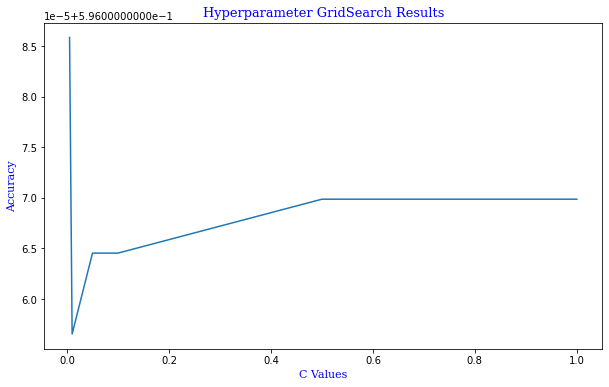

In [63]:
c = [0.005, 0.01, 0.05, 0.1, 0.5, 1]

lr_gridsearch(X_train_l, y_train_l, c)

LSD Tuned hyperparameter is at {'C': 0.001} with accuracy : 0.5961471871675806


,params,mean_test_score
0,{'C': 0.001},0.596147
1,{'C': 0.002},0.596139
2,{'C': 0.003},0.596099
3,{'C': 0.004},0.596089
4,{'C': 0.005},0.596086
5,{'C': 0.006},0.596081


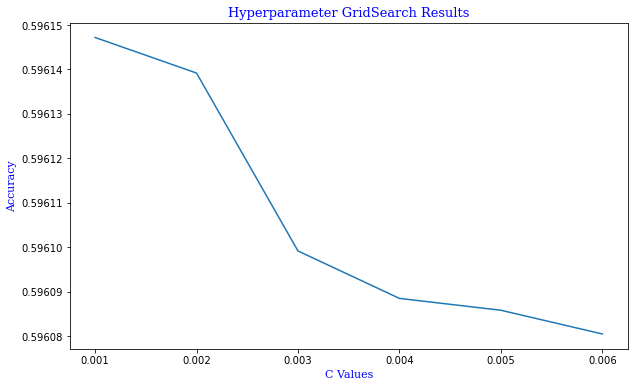

In [64]:
lr_gridsearch(X_train_l, y_train_l, np.arange(0.001, 0.007, 0.001))

### PE, Tau = 3

LSD Tuned hyperparameter is at {'C': 1} with accuracy : 0.6425319048407492


,params,mean_test_score
0,{'C': 0.005},0.642489
1,{'C': 0.01},0.642492
2,{'C': 0.05},0.642513
3,{'C': 0.1},0.642527
4,{'C': 0.5},0.642529
5,{'C': 1},0.642532


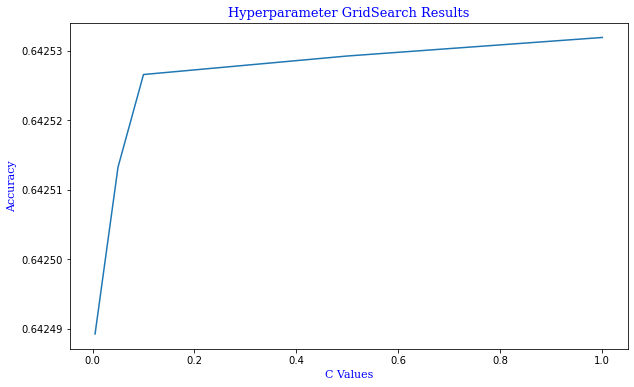

In [65]:
c = [0.005, 0.01, 0.05, 0.1, 0.5, 1]

lr_gridsearch(X_train_l3, y_train_l3, c)

LSD Tuned hyperparameter is at {'C': 1.0} with accuracy : 0.6425319048407492


,params,mean_test_score
0,{'C': 1.0},0.642532
1,{'C': 1.1},0.642532
2,{'C': 1.2000000000000002},0.642532
3,{'C': 1.3000000000000003},0.642532
4,{'C': 1.4000000000000004},0.642532
5,{'C': 1.5000000000000004},0.642532
6,{'C': 1.6000000000000005},0.642532


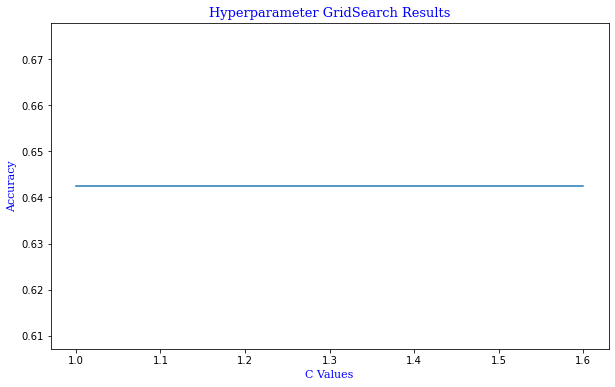

In [66]:
lr_gridsearch(X_train_l3, y_train_l3, np.arange(1, 1.7, 0.1))

## Logistic Regression: Final Results

### PE, Tau = 1

In [67]:
#importing the logistic regression function from sklearn 
log_reg = LogisticRegression(solver = 'liblinear', C=0.001, penalty = 'l1')
#training the model on dev data 
log_reg.fit(X_train_l,y_train_l)

#using the test data to test for the scores
y_pred_lr = log_reg.predict(X_test_l)
metricscalc(y_test_l, y_pred_lr)

Accuracy: 0.595 
Error: 0.405 
Precesion: 0.597 
Recall: 0.593 
F1 score:0.589 



### PE, Tau = 3

In [68]:
#importing the logistic regression function from sklearn 
log_reg = LogisticRegression(solver = 'liblinear', C=1, penalty = 'l1')
#training the model on dev data 
log_reg.fit(X_train_l3,y_train_l3)

#using the test data to test for the scores
y_pred_lr = log_reg.predict(X_test_l3)
metricscalc(y_test_l3, y_pred_lr)

Accuracy: 0.641 
Error: 0.359 
Precesion: 0.651 
Recall: 0.639 
F1 score:0.632 



## Random Forest Classifier: Initial Classification

Before hyperparameter tuning

In [69]:
#importing random forest from sklearn
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier()
#fitting the x dev and y dev to the random forest classifier
#training on dev data
rfc.fit(X_train_l,y_train_l)

#testing on test data 
y_pred_rf = rfc.predict(X_test_l)
metricscalc(y_test_l,y_pred_rf)

Accuracy: 0.543 
Error: 0.457 
Precesion: 0.543 
Recall: 0.543 
F1 score:0.543 



In [70]:
#importing random forest from sklearn

rfc = RandomForestClassifier()
#fitting the x dev and y dev to the random forest classifier
#training on dev data
rfc.fit(X_train_l3,y_train_l3)

#testing on test data 
y_pred_rf = rfc.predict(X_test_l3)
metricscalc(y_test_l3,y_pred_rf)

Accuracy: 0.584 
Error: 0.416 
Precesion: 0.584 
Recall: 0.584 
F1 score:0.583 



## Random Forest Classifier: 5 Fold Cross Validation and Hyper-parameter Tuning

Using grid search for hyperparameter tuning, with built in 5-fold cross validation

In [71]:
def rf_gridsearch (x, y, nvalues):
    #training the model
    clf= GridSearchCV(RandomForestClassifier(random_state = 1), {'n_estimators':nvalues}, cv=5) #cv = 5 is using 5 fold cross validation
    clf.fit(x, y)
    clf.cv_results_ #gridsearch function that prints results

    #displaying the results
    #best params is a setting that gave the best results on the hold out data
    #best score is the mean cross-validated score of the best_estimator 
    print("LSD Tuned hyperparameter is at",clf.best_params_, "with accuracy :",clf.best_score_) 

    #displaying the results
    df = pd.DataFrame(clf.cv_results_)
    display(df[['params','mean_test_score' ]])


    xplt = np.array(nvalues)
    plt.figure(figsize = (10,6))
    plt.plot(xplt, df.mean_test_score)

    #displaying the results in a graph
    font1 = {'family':'serif','color':'blue','size':13}
    font2 = {'family':'serif','color':'blue','size':11}
    plt.title('Hyperparameter GridSearch Results', fontdict = font1)
    plt.xlabel('Number of esimators', fontdict = font2)
    plt.ylabel('Accuracy', fontdict = font2)
    plt.show()

### PE, Tau = 1

In [ ]:
rf_gridsearch(X_train_l, y_train_l, np.arange(20, 120, 20))

C:\Users\Katie Buntic\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Katie Buntic\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Katie Buntic\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Katie Buntic\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Katie Buntic\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 808, in predict
    proba = self.predict_proba(X)
  File "C:\Users\Katie Buntic\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 861, in predict_

### PE, Tau = 3

In [ ]:
rf_gridsearch(X_train_l3, y_train_l3, np.arange(20, 120, 20))

### PE, Tau = 1

In [ ]:
#importing random forest from sklearn
rfc = RandomForestClassifier(n_jobs =2, n_estimators = 80)
#fitting the x dev and y dev to the random forest classifier
#training on dev data
rfc.fit(X_train_l,y_train_l)

#testing on test data 
y_pred_rf = rfc.predict(X_test_l)
metricscalc(y_test_l,y_pred_rf)

### PE, Tau = 3

In [ ]:
#importing random forest from sklearn

rfc = RandomForestClassifier(n_jobs =2, n_estimators = 100)
#fitting the x dev and y dev to the random forest classifier
#training on dev data
rfc.fit(X_train_l3,y_train_l3)

#testing on test data 
y_pred_rf = rfc.predict(X_test_l3)
metricscalc(y_test_l3,y_pred_rf)